<a href="https://colab.research.google.com/github/Pongpang-2102/Text_Mining_and_Sentiment_Analytics_KDAI_projects/blob/main/KDAI_TMSA_Midterm_Project_(10_Sep_23)___%E0%B8%82%E0%B9%89%E0%B8%AD_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Project วิชา Text Mining and Sentiment Analytics (1/2566)

## Student info

- Name : Puriwat Sangrawee ( นายภูริวัฒน์ แสงระวี)
- Student ID : 65056071
- สาขาวิชา : วิทยาการข้อมูลและการวิเคราะห์ (ชั้นปีที่ 2 )

# โจทย์ปัญหา

## ข้อ 1 : EDA (10 คะแนน)

**คำอธิบาย**
- ใช้ข้อมูลจาก File ที่ชื่อว่า Idea-Validation

*คำอธิบายเพิ่มเติม*
- File ที่ชื่อว่า  **Idea-Validation**  เป็นข้อมูลจากแบบประเมินที่นักศึกษาวิชา Innovation Startup ของมหาวิทยาลัยศิลปากรประเมินเพื่อน ๆ กลุ่มอื่น โดยชื่อทีมที่รับการประเมินมาจาก Dropdown List แต่   `ชื่อทีมที่เป็นผู้ประเมินมาจากการกรอกข้อความ`

- แต่ละทีมจะนำเสนอตามลำดับของตน ซึ่งสังเกตได้จากช่วงของ`ข้อมูลประทับเวลา `ซึ่งอาจมีบางกลุ่ม`ที่ประเมินผิด`

- Install & Import Libraries

In [ ]:
# install thai font
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:
# Install Pythai
!pip install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 42.8 MB/s eta 0:00:00


In [ ]:
# import neccessary package
import matplotlib as mpl

# call thai font  for using with mathplotlib
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [ ]:
# Import necessary Package

# Tabular Data Manipulation / Data Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Text Classification

from pythainlp.tokenize import word_tokenize, Tokenizer
from pythainlp.corpus.common import thai_words
from pythainlp.corpus import thai_stopwords

from difflib import SequenceMatcher, Differ, get_close_matches




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import file from computer : Idea-validation.xlsx
df=pd.read_excel('/content/drive/MyDrive/# KDAI_TextMining/Exam 4-10 Sep 23/Idea-Validation.xlsx')

In [ ]:
print(f"current row number = {df.shape[0]}\ncurrent col number = {df.shape[1]}")

current row number = 83
current col number = 7


In [ ]:
# view first 5 rows
df.head()

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......
0,2020-09-03 17:50:24.444,โรตีไข่ดาว,7,5,6,เสียงตอนพรีเซ้น custom journy เบาเกินไปครับ,อะหรือ อะหรือ
1,2020-09-03 17:53:21.863,โรตีไข่ดาว,9,7,8,-,ข้าวเหนียวมะม่วง
2,2020-09-03 17:53:27.729,โรตีไข่ดาว,7,6,6,ราคาอาจจะดูไม่คุ้มทุนเท่าไหร่,ศิลปะยืนยาวเวลานอนสั้น
3,2020-09-03 17:54:16.121,โรตีไข่ดาว,9,7,8,สินค้าน่าสนใจ แต่อาจมีปัญหาเรื่องสัญญาณรบกวนได้,ป่งป๊ง
4,2020-09-03 17:55:17.173,โรตีไข่ดาว,5,5,4,ควรกำหนดกลุ่มเป้าหมายให้ชัดเจนกว่านี้ และเจาะก...,อ.พู่


In [ ]:
# ดูชื่อคอลัมน์
df.columns

Index(['ประทับเวลา', 'ชื่อทีมที่รับการประเมิน',
       'User Journey ชัดเจนสมเหตุสมผลระดับใด',
       'ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ',
       'ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่',
       'ข้อเสนอแนะเพิ่มเติม', 'ให้ความคิดเห็นโดยทีม......'],
      dtype='object')

In [ ]:
# เราจะมาทำการสังเกตเฉพาะคอลัมน์ที่สนใจเพียง 3 คอลัมน์ คือ ประทับเวลา / ชื่อที่มที่ได้รับการประเมิน และ ชื่อทีมที่ให้ความเห็น
selected_columns = df [     [  'ประทับเวลา','ชื่อทีมที่รับการประเมิน' ,  'ให้ความคิดเห็นโดยทีม......']    ]
selected_columns

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,ให้ความคิดเห็นโดยทีม......
0,2020-09-03 17:50:24.444,โรตีไข่ดาว,อะหรือ อะหรือ
1,2020-09-03 17:53:21.863,โรตีไข่ดาว,ข้าวเหนียวมะม่วง
2,2020-09-03 17:53:27.729,โรตีไข่ดาว,ศิลปะยืนยาวเวลานอนสั้น
3,2020-09-03 17:54:16.121,โรตีไข่ดาว,ป่งป๊ง
4,2020-09-03 17:55:17.173,โรตีไข่ดาว,อ.พู่
...,...,...,...
78,2020-09-03 19:46:18.378,ป่งป๊ง,อะหรือ อะหรือ
79,2020-09-03 19:46:45.734,ป่งป๊ง,ทีม แม่หนูกลัวโดเรม่อน
80,2020-09-03 19:46:49.243,ป่งป๊ง,ปังปุริเย่
81,2020-09-03 19:47:44.505,ป่งป๊ง,ข้าวเหนียวมะม่วง


In [ ]:
# นับจำนวนทีมที่เข้ารับการประเมินทั้งหมด
distinct_count = df['ชื่อทีมที่รับการประเมิน'].nunique()

print(f"จำนวนทีมทั้งหมด : {distinct_count} ทีม")

จำนวนทีมทั้งหมด : 9 ทีม


In [ ]:
# Recheck อีกรอบ พร้อมสังเกตจำนวนครั้งที่แต่ละทีมได้รับการประเมิน
df['ชื่อทีมที่รับการประเมิน'].value_counts()

We Bear Bear              11
ป่งป๊ง                    10
โรตีไข่ดาว                 9
อะหรือ อะหรือ              9
ข้าวเหนียวมะม่วง           9
ปังปุริเย่                 9
แม่หนูกกลัวโดเรม่อน        9
ศิลปะยืนยาวเวลานอนสั้น     9
SU Wake Up                 8
Name: ชื่อทีมที่รับการประเมิน, dtype: int64

Text(0.5, 1.0, 'ทีมที่เข้าแข่งขัน')

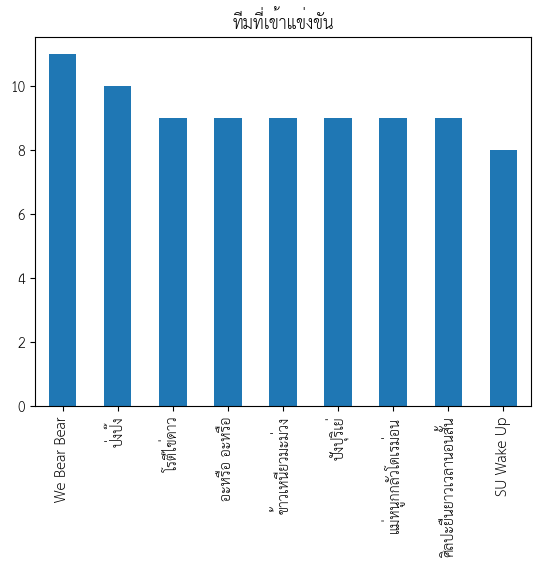

In [ ]:
df['ชื่อทีมที่รับการประเมิน'].value_counts().plot.bar()
plt.title('ทีมที่เข้าแข่งขัน')

- จะสังเกตได้ว่าทีมส่วนใหญ่จะได้รับการประเมินทั้งหมด 9 ครั้ง
- ดังนั้น ทีมที่เราต้องไปสืบหาความจริงเป็นอันดับแรก ๆ คือทีมที่มิได้ถูกประเมินด้วยจำนวนครั้งดังกล่าว ได้แก่ : We Bear Bear / ป่งป๊ง และ SU Wake Up

- ตรวจสอบข้อมูลคร่าว ๆ สำหรับทีมที่ถูกประเมิน 3 ทีม คือ We Bear Bear / ป่งป๊ง และ SU Wake Up ปรากฏผลลัพธ์ตามรายละเอียดด้านล่าง

In [ ]:
# ทีม We Bear Bear 11 ครั้ง
selected_columns  [ selected_columns [ 'ชื่อทีมที่รับการประเมิน'  ] == 'We Bear Bear'   ]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,ให้ความคิดเห็นโดยทีม......
8,2020-09-03 17:59:14.101,We Bear Bear,We bear bear
18,2020-09-03 18:24:23.962,We Bear Bear,อะหรือ อะหรือ
19,2020-09-03 18:35:09.442,We Bear Bear,ป่งป๊ง
20,2020-09-03 18:36:37.585,We Bear Bear,ศิละยืนยาวเวลานอนสั้น
21,2020-09-03 18:36:48.078,We Bear Bear,ข้าวเหนียวมะม่วง
22,2020-09-03 18:36:52.578,We Bear Bear,โรตี ไข่ดาว
23,2020-09-03 18:37:21.034,We Bear Bear,อ.พู่
24,2020-09-03 18:38:15.389,We Bear Bear,แม่หนูกลัวโดเรม่อน
25,2020-09-03 18:39:41.647,We Bear Bear,อาจจะซื้อสิ้นค้า
30,2020-09-03 18:52:46.038,We Bear Bear,We bear bear


In [ ]:
# ทีม ป่งป๊ง - 10 ครั้ง
selected_columns  [ selected_columns [ 'ชื่อทีมที่รับการประเมิน'  ] == 'ป่งป๊ง'   ]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,ให้ความคิดเห็นโดยทีม......
72,2020-09-03 19:44:33.206,ป่งป๊ง,โรตี ไข่ดาว
74,2020-09-03 19:45:28.333,ป่งป๊ง,ศิลปะยืนยาวเวลานอนสั้น
75,2020-09-03 19:45:31.330,ป่งป๊ง,We bear bear
76,2020-09-03 19:45:31.340,ป่งป๊ง,SU Wake Up💕
77,2020-09-03 19:45:38.963,ป่งป๊ง,อ.พู่
78,2020-09-03 19:46:18.378,ป่งป๊ง,อะหรือ อะหรือ
79,2020-09-03 19:46:45.734,ป่งป๊ง,ทีม แม่หนูกลัวโดเรม่อน
80,2020-09-03 19:46:49.243,ป่งป๊ง,ปังปุริเย่
81,2020-09-03 19:47:44.505,ป่งป๊ง,ข้าวเหนียวมะม่วง
82,2020-09-03 20:56:24.953,ป่งป๊ง,ศิลปะยืนยาวเวลานอนสั้น


In [ ]:
# ทีม SU Wake Up : 8 ครั้ง
selected_columns  [ selected_columns [ 'ชื่อทีมที่รับการประเมิน'  ] == 'SU Wake Up'   ]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,ให้ความคิดเห็นโดยทีม......
26,2020-09-03 18:47:07.173,SU Wake Up,โรตีไข่ดาว
27,2020-09-03 18:50:52.564,SU Wake Up,อ.พู่
28,2020-09-03 18:51:55.856,SU Wake Up,อะหรืออะหรือ
29,2020-09-03 18:51:59.056,SU Wake Up,ปังปุริเย่
31,2020-09-03 18:53:30.727,SU Wake Up,ข้าวเหนียวมะม่วง
32,2020-09-03 18:54:12.396,SU Wake Up,ป่งป๊ง
35,2020-09-03 18:54:55.658,SU Wake Up,ศิลปะยืนยาวเวลานอนสั้น
36,2020-09-03 19:04:00.160,SU Wake Up,แม่หนูกลัวโดเรม่อน


- ทำการตรวจสอบข้อมูล จำนวนครั้งการประเมิน ที่เกิดขึ้นจากแต่ละผู้ประเมิน จะได้ผลลัพธ์ดังแสดงด้านล่าง (ตาราง และ กราฟ)

In [ ]:
df['ให้ความคิดเห็นโดยทีม......'].value_counts()

ศิลปะยืนยาวเวลานอนสั้น    8
ป่งป๊ง                    8
อ.พู่                     8
ข้าวเหนียวมะม่วง          8
อะหรือ อะหรือ             7
SU Wake Up💕               7
We bear bear              6
โรตี ไข่ดาว               6
แม่หนูกลัวโดเรม่อน        5
ปังปุริเย่                5
ทีม แม่หนูกลัวโดเรม่อน    3
We Bear Bear              2
อะหรืออะหรือ              2
อาจจะซื้อสิ้นค้านี้       1
ซื้อบริการนี้             1
SU Wake Up                1
ศิละยืนยาวเวลานอนสั้น     1
อาจจะซื้อสิ้นค้า          1
โรตีไข่ดาว                1
อ.พุ่                     1
โรตี-ไข่ดาว               1
Name: ให้ความคิดเห็นโดยทีม......, dtype: int64

Text(0.5, 1.0, 'จำนวนครั้งในการให้ความเห็นทีมอื่น ๆ')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


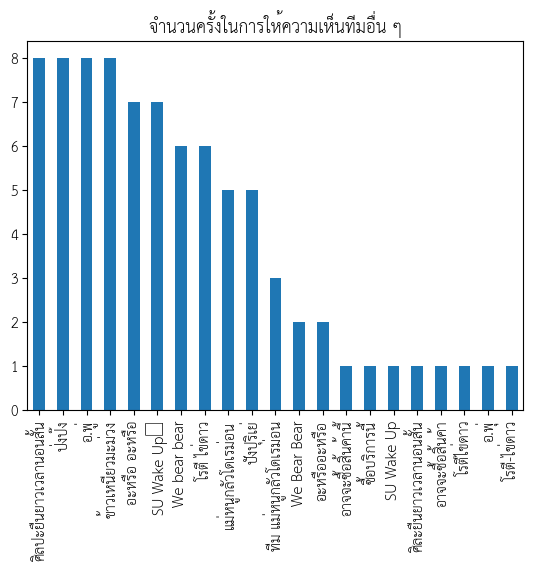

In [ ]:
df['ให้ความคิดเห็นโดยทีม......'].value_counts().plot.bar()
plt.title('จำนวนครั้งในการให้ความเห็นทีมอื่น ๆ')

ข้อสังเกต
- จะเห็นว่า การลงช้อมูล `ชื่อกลุ่ม` ในตำแหน่งที่เป็นผู้ประเมิน และผู้ถูกประเมิน ไม่ได้ใช้ wording เดียวกัน ซึ่งอาจทำให้เกิดความสับสนในการวิเคราะห์ และพยากรณ์ได้
- จะเห็นว่า นอกจากแต่ละกลุ่มต้องประเมินกลุ่มอื่น ๆ ที่ไม่ใช่กลุ่มตัวเองแล้ว แต่ละกลุ่มยังจะได้รับการประเมินจาก `อ. พู่`  ซึ่งนั่นแปลว่า หากจำนวนกลุ่มมีทั้งสิน 9 กลุ่ม แต่ละกลุ่มจะสามารถ `ประเมิน` กลุ่มอื่นได้ไม่เกิน 8 ครั้ง และสามารถ `ได้รับการประเมิน` ได้ทั้งหมด 9 ครั้ง

 ขั้นตอนต่อไป
 - เราอาจต้องทำการเปลี่ยนชื่อกลุ่มผู้ประเมิน ที่แสดงในคอลัมน์  `'ให้ความคิดเห็นโดยทีม......'` ให้ชื่อกลุ่มแต่ละกลุ่มสอดคล้อง ตรงกับคอลัมน์ `'ชื่อทีมที่รับการประเมิน'` เพื่อลดความสับสันในการวิเคราะห์ข้อมูล ซึ่งสามารถทำได้ดังต่อไปนี้
 - สำหรับชื่อทีมแปลก ๆ (ที่อาจเกิดจากการกรอกผิดช่อง) ไว้ว่ากันทีหลัง


In [ ]:
# Define a mapping to rename similar records
rename_mapping = {'โรตี-ไข่ดาว'                   : 'โรตีไข่ดาว',
                                'โรตี ไข่ดาว'                 : 'โรตีไข่ดาว' ,
                                'อ.พุ่'                           : 'อ.พู่',
                                'ศิละยืนยาวเวลานอนสั้น'  :  'ศิลปะยืนยาวเวลานอนสั้น',
                                'SU Wake Up💕'          :  'SU Wake Up' ,
                                'อะหรืออะหรือ'              :  'อะหรือ อะหรือ',
                                'We bear bear'             :   'We Bear Bear',
                                'ทีม แม่หนูกลัวโดเรม่อน'  :   'แม่หนูกลัวโดเรม่อน',
                                'แม่หนูกกลัวโดเรม่อน'     :  'แม่หนูกลัวโดเรม่อน'
                   }



In [ ]:
# Using the replace() method
df['ให้ความคิดเห็นโดยทีม......'] = df['ให้ความคิดเห็นโดยทีม......'].replace(rename_mapping)

In [ ]:
df['ให้ความคิดเห็นโดยทีม......'].value_counts()

อะหรือ อะหรือ             9
ศิลปะยืนยาวเวลานอนสั้น    9
อ.พู่                     9
ข้าวเหนียวมะม่วง          8
ป่งป๊ง                    8
SU Wake Up                8
แม่หนูกลัวโดเรม่อน        8
We Bear Bear              8
โรตีไข่ดาว                8
ปังปุริเย่                5
อาจจะซื้อสิ้นค้านี้       1
ซื้อบริการนี้             1
อาจจะซื้อสิ้นค้า          1
Name: ให้ความคิดเห็นโดยทีม......, dtype: int64

Text(0.5, 1.0, 'จำนวนครั้งในการให้ความเห็นทีมอื่น ๆ')

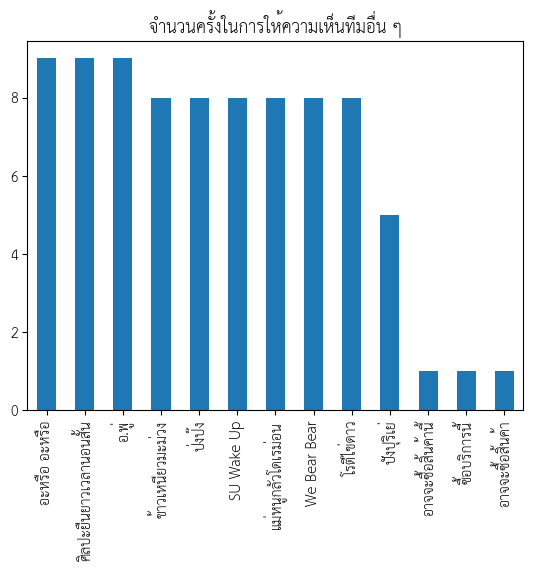

In [ ]:
df['ให้ความคิดเห็นโดยทีม......'].value_counts().plot.bar()
plt.title('จำนวนครั้งในการให้ความเห็นทีมอื่น ๆ')

**โจทย์**
- ให้จัดการข้อมูลใน File นี้ด้วยความรู้ที่ได้เรียนในวิชา Text Mining and Sentiment Analysis เพื่อให้ได้ผลลัพธ์ที่ตอบคำถามได้อย่างน้อย ต่อไปนี้

### 1.1 มีทีมใดบ้าง ที่ประเมินผิดกลุ่ม เมื่อดูจากข้อมูลประทับเวลา



#### ตอบคำถาม 1.1

*Ans*

เมื่อพิจารณาเฉพาะ `ข้อมูลตราประทับเวลา` จะพบว่าทีมที่ประเมินผิด มีทั้งสิ้น `1 ทีม` ดังต่อไปนี้
- *We Bear Bear*

โดยจุดที่คาดว่าประเมินผิกลุ่มมีอยู่ 2 record ได้แก่
- `index 8` : `We Bear Bear` ประเมินทีม `We Bear Bear` (time : 17:59:14) (ซึ่งเป็นจุดเวลาเชื่อมต่อระหว่างการ Present ของทีม `โรตีไข่ดาว` และ `อะหรือ อะหรือ`
- `index 30` : `We Bear Bear` ประเมินทีม `We Bear Bear`  (time : 18:52:46) ซึ่งจากบริบทแวดล้อม จะเป็นช่วงเวลาระหว่างการนำเสนอและประเมินของทีม `SU Wake Up`



- โดยการพิจารณาดังกล่าวนี้จะต้องพิจารณาให้ถี่ถ้วน เนื่องจากบางทีมก็อาจจะมีการประเมินไม่ตรงกับการนำเสนอขณะนั้น (ประเมินทีหลัง) (3 records )หรือบางทีมอาจมีการกดซ้ำ (1 records) หรืออาจใส่ชื่อทีมผิด ซึ่งไม่ใช่สิ่งที่โจทย์อยากทราบ


#### ช่วงข้อมูล 1.1

In [ ]:
df.loc[:10]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......
0,2020-09-03 17:50:24.444,โรตีไข่ดาว,7,5,6,เสียงตอนพรีเซ้น custom journy เบาเกินไปครับ,อะหรือ อะหรือ
1,2020-09-03 17:53:21.863,โรตีไข่ดาว,9,7,8,-,ข้าวเหนียวมะม่วง
2,2020-09-03 17:53:27.729,โรตีไข่ดาว,7,6,6,ราคาอาจจะดูไม่คุ้มทุนเท่าไหร่,ศิลปะยืนยาวเวลานอนสั้น
3,2020-09-03 17:54:16.121,โรตีไข่ดาว,9,7,8,สินค้าน่าสนใจ แต่อาจมีปัญหาเรื่องสัญญาณรบกวนได้,ป่งป๊ง
4,2020-09-03 17:55:17.173,โรตีไข่ดาว,5,5,4,ควรกำหนดกลุ่มเป้าหมายให้ชัดเจนกว่านี้ และเจาะก...,อ.พู่
5,2020-09-03 17:55:27.787,โรตีไข่ดาว,8,7,7,อธิบายนำเสนอตัวสินค้าให้ผู้ทำแบบประเมินฟังยังไ...,SU Wake Up
6,2020-09-03 17:56:14.190,โรตีไข่ดาว,6,6,7,อยากทราบว่าผลิตภัณฑ์มีความทนทานมากน้อยแค่ไหน,อาจจะซื้อสิ้นค้านี้
7,2020-09-03 17:57:02.981,โรตีไข่ดาว,8,8,7,สินค้าราคาถูกเกินไป,แม่หนูกลัวโดเรม่อน
8,2020-09-03 17:59:14.101,We Bear Bear,7,7,5,น่าจะทำเเบบสำรวจให้มากกว่านี้ เพื่อที่จะได้ข้อ...,We Bear Bear
9,2020-09-03 18:03:53.242,อะหรือ อะหรือ,8,6,6,อาจจะเสียเวลาในการสั่งมากไปเพราะต้องสมัครสมาชิ...,ป่งป๊ง


In [ ]:
df.loc[9:19]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......
9,2020-09-03 18:03:53.242,อะหรือ อะหรือ,8,6,6,อาจจะเสียเวลาในการสั่งมากไปเพราะต้องสมัครสมาชิ...,ป่งป๊ง
10,2020-09-03 18:05:03.284,อะหรือ อะหรือ,7,5,5,ต่างกับแอปอื่นๆอย่างไร แล้วfoodpanda หรือgrabม...,We Bear Bear
11,2020-09-03 18:07:30.853,อะหรือ อะหรือ,7,6,6,จุดเด่นของแอพพลิเคชันคืออะไร,โรตีไข่ดาว
12,2020-09-03 18:07:57.568,อะหรือ อะหรือ,9,9,9,-,ข้าวเหนียวมะม่วง
13,2020-09-03 18:08:11.921,อะหรือ อะหรือ,7,7,7,อาจะต้องคิดเผื่อเรื่องลูกค้ามาช้าแล้วทำให้โต๊ะ...,ศิลปะยืนยาวเวลานอนสั้น
14,2020-09-03 18:08:37.098,อะหรือ อะหรือ,6,6,6,ควรสัมภาษณ์ร้านค้า และควรให้แบบสอบถามกระจายถึง...,อ.พู่
15,2020-09-03 18:08:57.443,อะหรือ อะหรือ,9,8,8,ร้านค้าก็ต้องคอยรับคิวอยู่ตลอดเวลาใช่ไหม แล้วจ...,ซื้อบริการนี้
16,2020-09-03 18:09:22.060,อะหรือ อะหรือ,8,5,8,ถ้าพูดถึงข้อเสนอเเนะของสินค้า หรือบริการ คือคิ...,SU Wake Up
17,2020-09-03 18:10:53.154,อะหรือ อะหรือ,9,6,7,อาจจะมีคูปองส่วนลดให้สำหรับสมาชิก,แม่หนูกลัวโดเรม่อน
18,2020-09-03 18:24:23.962,We Bear Bear,6,5,5,เสียงในวิดีโอเบาไปหน่อย,อะหรือ อะหรือ


In [ ]:
df.loc[18:28]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......
18,2020-09-03 18:24:23.962,We Bear Bear,6,5,5,เสียงในวิดีโอเบาไปหน่อย,อะหรือ อะหรือ
19,2020-09-03 18:35:09.442,We Bear Bear,9,8,8,อยากให้สอบถามผู้ปกครองที่มีเด็กด้วยว่าเขาสนใจห...,ป่งป๊ง
20,2020-09-03 18:36:37.585,We Bear Bear,8,6,6,ราคาอาจะทำให้คนคิดว่าไม่คุ้มกะที่ซื้อมาติดเพรา...,ศิลปะยืนยาวเวลานอนสั้น
21,2020-09-03 18:36:48.078,We Bear Bear,9,7,8,-,ข้าวเหนียวมะม่วง
22,2020-09-03 18:36:52.578,We Bear Bear,7,6,6,อยากทราบรายละเอียดเรื่อง Ai,โรตีไข่ดาว
23,2020-09-03 18:37:21.034,We Bear Bear,6,4,5,ลองคิดทบทวนดีๆว่าเราเจาะกลุ่มเป้าหมายถูกแล้วหร...,อ.พู่
24,2020-09-03 18:38:15.389,We Bear Bear,9,7,8,อยากให้มีฟังก์ชันการทำงานเพิ่มขึ้น,แม่หนูกลัวโดเรม่อน
25,2020-09-03 18:39:41.647,We Bear Bear,8,8,7,ราคากำลังดี,อาจจะซื้อสิ้นค้า
26,2020-09-03 18:47:07.173,SU Wake Up,5,4,6,ราคาค่อนข้างสูงไปนิด เพราะต้องซื้อหลายชิ้นนำไป...,โรตีไข่ดาว
27,2020-09-03 18:50:52.564,SU Wake Up,6,7,7,นำราคาที่กลุ่มเป้าหมายสนใจไปประเมินหาราคาที่เห...,อ.พู่


In [ ]:
df.loc[26:39]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......
26,2020-09-03 18:47:07.173,SU Wake Up,5,4,6,ราคาค่อนข้างสูงไปนิด เพราะต้องซื้อหลายชิ้นนำไป...,โรตีไข่ดาว
27,2020-09-03 18:50:52.564,SU Wake Up,6,7,7,นำราคาที่กลุ่มเป้าหมายสนใจไปประเมินหาราคาที่เห...,อ.พู่
28,2020-09-03 18:51:55.856,SU Wake Up,7,8,7,-,อะหรือ อะหรือ
29,2020-09-03 18:51:59.056,SU Wake Up,8,8,8,อยากให้ราคาน้อยลงกว่านี้,ปังปุริเย่
30,2020-09-03 18:52:46.038,We Bear Bear,7,7,7,อาจจะซื้อถ้ามีราคาถูก,We Bear Bear
31,2020-09-03 18:53:30.727,SU Wake Up,10,9,9,-,ข้าวเหนียวมะม่วง
32,2020-09-03 18:54:12.396,SU Wake Up,9,10,9,การสอบถามครอบคลุมดี,ป่งป๊ง
33,2020-09-03 18:54:44.571,We Bear Bear,8,8,8,ยังอธิบายตัวสินค้าให้แกผู้ประเมินยังไม่ชัดเจนเ...,SU Wake Up
34,2020-09-03 18:54:50.165,โรตีไข่ดาว,7,5,6,เสียงตอนพรีเซ้น custom journy เบาเกินไปครับ,อะหรือ อะหรือ
35,2020-09-03 18:54:55.658,SU Wake Up,8,7,8,เสียงในวิดิโอไม่ค่อยได้ยิน,ศิลปะยืนยาวเวลานอนสั้น


In [ ]:
df.loc[37:47]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......
37,2020-09-03 19:05:46.242,ข้าวเหนียวมะม่วง,8,7,7,- ร้านรายย่อยไม่มีบัตรเครดิต \n- กูเกิ้ลแมพก็ห...,SU Wake Up
38,2020-09-03 19:05:52.274,ข้าวเหนียวมะม่วง,6,6,6,การสุ่มควรมีการแยกประเภท อาหาร คาวหวาน หรือแยก...,โรตีไข่ดาว
39,2020-09-03 19:09:32.731,ข้าวเหนียวมะม่วง,7,7,7,อยากทราบเวลาที่ร้านเปิด-ปิด,ปังปุริเย่
40,2020-09-03 19:10:24.837,ข้าวเหนียวมะม่วง,6,6,7,product อาจจะไม่ตรงใจคนที่แพ้อาหาร หรือคนที่กิ...,อะหรือ อะหรือ
41,2020-09-03 19:10:27.149,ข้าวเหนียวมะม่วง,5,4,4,ราคา อาจสูงเกินไป,แม่หนูกลัวโดเรม่อน
42,2020-09-03 19:10:49.868,ข้าวเหนียวมะม่วง,6,5,6,จะแตกต่างจาก wongnai หรือ app ที่มีอยู่ในท้องต...,อ.พู่
43,2020-09-03 19:10:50.823,ข้าวเหนียวมะม่วง,8,5,6,ร้านค้าที่มีในแอปจำกัดพื้นที่หรือไม่ เงื่อนไขใ...,ป่งป๊ง
44,2020-09-03 19:16:10.532,ปังปุริเย่,7,7,7,ถ้าเป็นไปได้อยากใช้บริการ สะดวกสบาย ไม่ต้องรอนาน,We Bear Bear
45,2020-09-03 19:17:54.544,ปังปุริเย่,7,6,7,โอกาสที่โปรแกรมจะผิดพลาดมีมากน้อยแค่ไหน,อะหรือ อะหรือ
46,2020-09-03 19:19:09.688,ปังปุริเย่,7,6,7,ระดับราคาที่ถาม ใกล้เคียงกันเกินไป,อ.พู่


In [ ]:
df.loc[44:55]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......
44,2020-09-03 19:16:10.532,ปังปุริเย่,7,7,7,ถ้าเป็นไปได้อยากใช้บริการ สะดวกสบาย ไม่ต้องรอนาน,We Bear Bear
45,2020-09-03 19:17:54.544,ปังปุริเย่,7,6,7,โอกาสที่โปรแกรมจะผิดพลาดมีมากน้อยแค่ไหน,อะหรือ อะหรือ
46,2020-09-03 19:19:09.688,ปังปุริเย่,7,6,7,ระดับราคาที่ถาม ใกล้เคียงกันเกินไป,อ.พู่
47,2020-09-03 19:20:46.341,ปังปุริเย่,7,6,7,ระบบน่าสนใจ ควรพัฒนาให้ใช้ได้จริง,โรตีไข่ดาว
48,2020-09-03 19:22:07.261,ปังปุริเย่,9,9,9,-,ข้าวเหนียวมะม่วง
49,2020-09-03 19:22:12.462,ปังปุริเย่,8,9,8,ถ้าเป็นพาทเนอร์เจ้าของกิจการเขาจะรวมมือกับเราม...,SU Wake Up
50,2020-09-03 19:22:23.043,ปังปุริเย่,9,7,7,กลุ่มเป้าหมายเหมาะสม เสนอให้มีราคาเหมาจ่ายดีกว่า,ป่งป๊ง
51,2020-09-03 19:23:32.878,ข้าวเหนียวมะม่วง,6,7,7,ถ้าร้านเปิดปิดกระกันทันจะเเจ้งด้วยไหม,We Bear Bear
52,2020-09-03 19:24:01.453,ปังปุริเย่,6,7,6,อยากให้ราคาที่กว้างกว่านี้,แม่หนูกลัวโดเรม่อน
53,2020-09-03 19:24:04.955,ข้าวเหนียวมะม่วง,7,7,7,เพิ่มระบบนำทางไปสถานที่นั้น\n,ศิลปะยืนยาวเวลานอนสั้น


In [ ]:
df.loc[55:65]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......
55,2020-09-03 19:31:05.520,แม่หนูกกลัวโดเรม่อน,7,7,7,น่าจะมีแอพที่จัดการหรือตั้งค่าตัวสินค้าได้ด้วย,ศิลปะยืนยาวเวลานอนสั้น
56,2020-09-03 19:32:18.016,แม่หนูกกลัวโดเรม่อน,4,7,7,ต่างจากที่ขายกันตามท้องตลาดอย่างไรบ้าง,อ.พู่
57,2020-09-03 19:32:37.560,แม่หนูกกลัวโดเรม่อน,7,6,7,จะรู้ได้ยังไงว่าคนสวมใส่ล้ม,โรตีไข่ดาว
58,2020-09-03 19:33:47.837,แม่หนูกกลัวโดเรม่อน,4,6,5,ยังไม่ค่อยเข้าใจตรง journey,อะหรือ อะหรือ
59,2020-09-03 19:34:37.166,แม่หนูกกลัวโดเรม่อน,7,8,8,-,ข้าวเหนียวมะม่วง
60,2020-09-03 19:34:37.325,แม่หนูกกลัวโดเรม่อน,5,7,5,ถ้าเกิดเราประสบอุบัติเหตุ อุปกรณ์จะทำงานได้ไง ...,We Bear Bear
61,2020-09-03 19:35:07.927,แม่หนูกกลัวโดเรม่อน,8,7,9,ไม่มี,SU Wake Up
62,2020-09-03 19:36:16.902,แม่หนูกกลัวโดเรม่อน,3,5,3,กลุ่มเป้าหมายครอบคลุมดี,ป่งป๊ง
63,2020-09-03 19:36:57.788,แม่หนูกกลัวโดเรม่อน,9,8,9,อยากให้ผลิตภัณฑ์มีฟังชั่นมากกว่านี้,ปังปุริเย่
64,2020-09-03 19:39:20.428,ศิลปะยืนยาวเวลานอนสั้น,9,9,9,การเลือกห้องควรมีเวลาจำกัด กลุ่มเป้าหมายชัดเจนดี,ป่งป๊ง


In [ ]:
df[64:75]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......
64,2020-09-03 19:39:20.428,ศิลปะยืนยาวเวลานอนสั้น,9,9,9,การเลือกห้องควรมีเวลาจำกัด กลุ่มเป้าหมายชัดเจนดี,ป่งป๊ง
65,2020-09-03 19:40:28.842,ศิลปะยืนยาวเวลานอนสั้น,8,7,6,ควรไปสัมภาษณ์หอพักด้วย,อ.พู่
66,2020-09-03 19:41:10.147,ศิลปะยืนยาวเวลานอนสั้น,7,6,6,ข้อมูล ar จะอัพเดทตลอดเวลาไหม,โรตีไข่ดาว
67,2020-09-03 19:41:55.852,ศิลปะยืนยาวเวลานอนสั้น,9,9,8,-,ข้าวเหนียวมะม่วง
68,2020-09-03 19:42:36.408,ศิลปะยืนยาวเวลานอนสั้น,9,8,8,ไม่มี,SU Wake Up
69,2020-09-03 19:42:55.380,ศิลปะยืนยาวเวลานอนสั้น,7,6,7,มีความปลอดภัยหรือความน่าเชื่อถือมากน้อยเเค่ไหน...,We Bear Bear
70,2020-09-03 19:43:35.153,ศิลปะยืนยาวเวลานอนสั้น,8,8,7,อยากให้มีการอัปเดพรูป เวลามีอะไรใหม่,แม่หนูกลัวโดเรม่อน
71,2020-09-03 19:43:46.639,ศิลปะยืนยาวเวลานอนสั้น,8,7,8,ตัวแอปที่ใช้ ar อาจจะมีบัค หรือ เวลาดูใน ar ก...,อะหรือ อะหรือ
72,2020-09-03 19:44:33.206,ป่งป๊ง,6,6,6,ความปลอดภัยระดับไหน,โรตีไข่ดาว
73,2020-09-03 19:45:09.241,ศิลปะยืนยาวเวลานอนสั้น,9,8,9,อยากทราบว่าหอพักที่อยู่ในเเอปจะปลอดภัยไหม,ปังปุริเย่


In [ ]:
df[72:]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......
72,2020-09-03 19:44:33.206,ป่งป๊ง,6,6,6,ความปลอดภัยระดับไหน,โรตีไข่ดาว
73,2020-09-03 19:45:09.241,ศิลปะยืนยาวเวลานอนสั้น,9,8,9,อยากทราบว่าหอพักที่อยู่ในเเอปจะปลอดภัยไหม,ปังปุริเย่
74,2020-09-03 19:45:28.333,ป่งป๊ง,8,7,7,-,ศิลปะยืนยาวเวลานอนสั้น
75,2020-09-03 19:45:31.330,ป่งป๊ง,7,7,7,อยากให้ระบบปลอดภัยมาขึ้น เพราะเดี้ยวนี้มิจฉาชี...,We Bear Bear
76,2020-09-03 19:45:31.340,ป่งป๊ง,9,8,8,ไม่มี,SU Wake Up
77,2020-09-03 19:45:38.963,ป่งป๊ง,8,6,6,ถ้ามีมิจฉาชีพแฝงตัว จะป้องกันอย่างไร และถ้าแนว...,อ.พู่
78,2020-09-03 19:46:18.378,ป่งป๊ง,5,6,6,ถ้าบางคนนัดเจอแต่ไม่ได้กินที่ร้านเหล้า แล้วพาไ...,อะหรือ อะหรือ
79,2020-09-03 19:46:45.734,ป่งป๊ง,6,5,5,อยากให้ระบุความปลอดภัย ให้มีความน่าเชื่อถือกว่...,แม่หนูกลัวโดเรม่อน
80,2020-09-03 19:46:49.243,ป่งป๊ง,8,7,7,ความปลอดภัยน่าเชื่อถือน้อย,ปังปุริเย่
81,2020-09-03 19:47:44.505,ป่งป๊ง,8,5,8,อาจจะมีมิชฉาฉีพถือโอกาสแฝงตัวเข้ามา,ข้าวเหนียวมะม่วง


### 1.2 แก้ไขทีมที่ถูกประเมินให้ถูกต้องตามลำดับของ ข้อมูลประทับเวลา ที่ควรจะเป็น

- จากข้อ 1.1 ที่เราทราบแล้วว่าทีม `We Bear Bear` ประเมินผิดกลุ่มจำนวน `2 ครั้ง`  (Index 8 และ index 30 ณ ขณะนี้) เราจะมาแก้ไขข้อมูลส่วนนี้กันก่อน

#### 1.2.1 แก้ไขข้อมูล Index 8 และ 30

-เรียกดู index 8 และ 30 อีกครั้ง

In [ ]:
df.loc[[8,30]]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......
8,2020-09-03 17:59:14.101,We Bear Bear,7,7,5,น่าจะทำเเบบสำรวจให้มากกว่านี้ เพื่อที่จะได้ข้อ...,We Bear Bear
30,2020-09-03 18:52:46.038,We Bear Bear,7,7,7,อาจจะซื้อถ้ามีราคาถูก,We Bear Bear


- ซึ่งจากข้อมูล เราทราบแน่แล้วว่า ในจุดเวลา 18:52:46 หรือ `index 30` เราจะต้องเปลี่ยนข้อมูล `ชื่อทีมที่รับการประเมิน` จาก `We Bear Bear` เป็น `SU Wake Up` จึงเหลือพิจารณาเพียง `index 8` เท่านั้น

- มาพิจารณาเฉพาะข้อมูลที่  `ชื่อทีมที่รับการประเมิน` คือ `We Bear Bear` , `โรตีไข่ดาว` และ `อะหรือ อะหรือ`

*- ทีมที่ 1 : โรตีไข่ดาว*

In [ ]:
df[ df['ชื่อทีมที่รับการประเมิน'] == 'โรตีไข่ดาว' ]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......
0,2020-09-03 17:50:24.444,โรตีไข่ดาว,7,5,6,เสียงตอนพรีเซ้น custom journy เบาเกินไปครับ,อะหรือ อะหรือ
1,2020-09-03 17:53:21.863,โรตีไข่ดาว,9,7,8,-,ข้าวเหนียวมะม่วง
2,2020-09-03 17:53:27.729,โรตีไข่ดาว,7,6,6,ราคาอาจจะดูไม่คุ้มทุนเท่าไหร่,ศิลปะยืนยาวเวลานอนสั้น
3,2020-09-03 17:54:16.121,โรตีไข่ดาว,9,7,8,สินค้าน่าสนใจ แต่อาจมีปัญหาเรื่องสัญญาณรบกวนได้,ป่งป๊ง
4,2020-09-03 17:55:17.173,โรตีไข่ดาว,5,5,4,ควรกำหนดกลุ่มเป้าหมายให้ชัดเจนกว่านี้ และเจาะก...,อ.พู่
5,2020-09-03 17:55:27.787,โรตีไข่ดาว,8,7,7,อธิบายนำเสนอตัวสินค้าให้ผู้ทำแบบประเมินฟังยังไ...,SU Wake Up
6,2020-09-03 17:56:14.190,โรตีไข่ดาว,6,6,7,อยากทราบว่าผลิตภัณฑ์มีความทนทานมากน้อยแค่ไหน,อาจจะซื้อสิ้นค้านี้
7,2020-09-03 17:57:02.981,โรตีไข่ดาว,8,8,7,สินค้าราคาถูกเกินไป,แม่หนูกลัวโดเรม่อน
34,2020-09-03 18:54:50.165,โรตีไข่ดาว,7,5,6,เสียงตอนพรีเซ้น custom journy เบาเกินไปครับ,อะหรือ อะหรือ


*- ทีมที่ 2 : อะหรือ อะหรือ*

In [ ]:
df[ df['ชื่อทีมที่รับการประเมิน'] == 'อะหรือ อะหรือ' ]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......
9,2020-09-03 18:03:53.242,อะหรือ อะหรือ,8,6,6,อาจจะเสียเวลาในการสั่งมากไปเพราะต้องสมัครสมาชิ...,ป่งป๊ง
10,2020-09-03 18:05:03.284,อะหรือ อะหรือ,7,5,5,ต่างกับแอปอื่นๆอย่างไร แล้วfoodpanda หรือgrabม...,We Bear Bear
11,2020-09-03 18:07:30.853,อะหรือ อะหรือ,7,6,6,จุดเด่นของแอพพลิเคชันคืออะไร,โรตีไข่ดาว
12,2020-09-03 18:07:57.568,อะหรือ อะหรือ,9,9,9,-,ข้าวเหนียวมะม่วง
13,2020-09-03 18:08:11.921,อะหรือ อะหรือ,7,7,7,อาจะต้องคิดเผื่อเรื่องลูกค้ามาช้าแล้วทำให้โต๊ะ...,ศิลปะยืนยาวเวลานอนสั้น
14,2020-09-03 18:08:37.098,อะหรือ อะหรือ,6,6,6,ควรสัมภาษณ์ร้านค้า และควรให้แบบสอบถามกระจายถึง...,อ.พู่
15,2020-09-03 18:08:57.443,อะหรือ อะหรือ,9,8,8,ร้านค้าก็ต้องคอยรับคิวอยู่ตลอดเวลาใช่ไหม แล้วจ...,ซื้อบริการนี้
16,2020-09-03 18:09:22.060,อะหรือ อะหรือ,8,5,8,ถ้าพูดถึงข้อเสนอเเนะของสินค้า หรือบริการ คือคิ...,SU Wake Up
17,2020-09-03 18:10:53.154,อะหรือ อะหรือ,9,6,7,อาจจะมีคูปองส่วนลดให้สำหรับสมาชิก,แม่หนูกลัวโดเรม่อน


*- ทีมที่ 3 : We Bear Bear*

In [ ]:
df[ df['ชื่อทีมที่รับการประเมิน'] == 'We Bear Bear' ]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......
8,2020-09-03 17:59:14.101,We Bear Bear,7,7,5,น่าจะทำเเบบสำรวจให้มากกว่านี้ เพื่อที่จะได้ข้อ...,We Bear Bear
18,2020-09-03 18:24:23.962,We Bear Bear,6,5,5,เสียงในวิดีโอเบาไปหน่อย,อะหรือ อะหรือ
19,2020-09-03 18:35:09.442,We Bear Bear,9,8,8,อยากให้สอบถามผู้ปกครองที่มีเด็กด้วยว่าเขาสนใจห...,ป่งป๊ง
20,2020-09-03 18:36:37.585,We Bear Bear,8,6,6,ราคาอาจะทำให้คนคิดว่าไม่คุ้มกะที่ซื้อมาติดเพรา...,ศิลปะยืนยาวเวลานอนสั้น
21,2020-09-03 18:36:48.078,We Bear Bear,9,7,8,-,ข้าวเหนียวมะม่วง
22,2020-09-03 18:36:52.578,We Bear Bear,7,6,6,อยากทราบรายละเอียดเรื่อง Ai,โรตีไข่ดาว
23,2020-09-03 18:37:21.034,We Bear Bear,6,4,5,ลองคิดทบทวนดีๆว่าเราเจาะกลุ่มเป้าหมายถูกแล้วหร...,อ.พู่
24,2020-09-03 18:38:15.389,We Bear Bear,9,7,8,อยากให้มีฟังก์ชันการทำงานเพิ่มขึ้น,แม่หนูกลัวโดเรม่อน
25,2020-09-03 18:39:41.647,We Bear Bear,8,8,7,ราคากำลังดี,อาจจะซื้อสิ้นค้า
30,2020-09-03 18:52:46.038,We Bear Bear,7,7,7,อาจจะซื้อถ้ามีราคาถูก,We Bear Bear


- พิจารณาทีม We Bear Bear (ณ เวลา 17:59:14)

 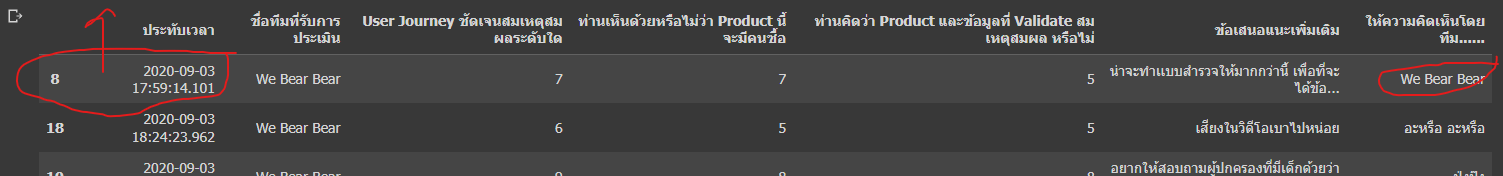

In [ ]:
df.loc[5:11]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......
5,2020-09-03 17:55:27.787,โรตีไข่ดาว,8,7,7,อธิบายนำเสนอตัวสินค้าให้ผู้ทำแบบประเมินฟังยังไ...,SU Wake Up
6,2020-09-03 17:56:14.190,โรตีไข่ดาว,6,6,7,อยากทราบว่าผลิตภัณฑ์มีความทนทานมากน้อยแค่ไหน,อาจจะซื้อสิ้นค้านี้
7,2020-09-03 17:57:02.981,โรตีไข่ดาว,8,8,7,สินค้าราคาถูกเกินไป,แม่หนูกลัวโดเรม่อน
8,2020-09-03 17:59:14.101,We Bear Bear,7,7,5,น่าจะทำเเบบสำรวจให้มากกว่านี้ เพื่อที่จะได้ข้อ...,We Bear Bear
9,2020-09-03 18:03:53.242,อะหรือ อะหรือ,8,6,6,อาจจะเสียเวลาในการสั่งมากไปเพราะต้องสมัครสมาชิ...,ป่งป๊ง
10,2020-09-03 18:05:03.284,อะหรือ อะหรือ,7,5,5,ต่างกับแอปอื่นๆอย่างไร แล้วfoodpanda หรือgrabม...,We Bear Bear
11,2020-09-03 18:07:30.853,อะหรือ อะหรือ,7,6,6,จุดเด่นของแอพพลิเคชันคืออะไร,โรตีไข่ดาว


- จะพบว่า ณ ช่วงเวลาดังกล่าว  เป็นช่วงที่อยู่ระหว่างการประเมินการนำเสนอของกลุ่ม `โรตีไข่ดาว` และกลุ่ม `อะหรือ อะหรือ`
- ซึ่งเราพบว่าทีม **We Bear Bear** ได้มีการประเมินการนำเสนอของกลุ่ม `อะหรือ อะหรือ `ในจุดเวลาที่สอดคล้องกับที่ทีมอื่น ๆ ประเมิน (หากนับผลการประเมินทั้งหมดในช่วงนี้จะมีครบ 9 ทีมพอดี )  แต่ในขณะเดียวกัน ทีม `โรตีไข่ดาว` กลับถูกประเมินเพียง 8 ครั้ง ก่อนหน้าการประเมินของ `We Bear Bear` ผมจึงตั้งข้อสันนิษฐานว่า ทีม `We Bear Bear` อาจเลือกรูปแบบการลงผิดในตอนแรก ที่ประเมินทีม `โรตีไข่ดาว` แล้วจึงทำการแก้ไขให้ถูกต้องในการประเมินครั้งที่ 2


*ข้อสรุป :*
- เราจะทำการแก้ไข`ชื่อทีมที่รับการประเมิน` ของ record ณ เวลา `17:59:14` (Index 8) จาก `We Bear Bear` เป็น `โรตีไข่ดาว` และ
- เราจะทำการแก้ไข`ชื่อทีมที่รับการประเมิน` ของ record ณ เวลา `18:52:46` (Index 30) จาก `We Bear Bear` เป็น `SU Wake Up`

- ทำการแก้ไข

In [ ]:
df.loc[8,'ชื่อทีมที่รับการประเมิน'] = 'โรตีไข่ดาว'
df.loc[30,'ชื่อทีมที่รับการประเมิน'] = 'SU Wake Up'

-เรียกดู index 8 และ 30 อีกครั้ง หลังการแก้ไข

In [ ]:
df.loc[[8,30]]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......
8,2020-09-03 17:59:14.101,โรตีไข่ดาว,7,7,5,น่าจะทำเเบบสำรวจให้มากกว่านี้ เพื่อที่จะได้ข้อ...,We Bear Bear
30,2020-09-03 18:52:46.038,SU Wake Up,7,7,7,อาจจะซื้อถ้ามีราคาถูก,We Bear Bear


In [ ]:
df.loc[:8]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......
0,2020-09-03 17:50:24.444,โรตีไข่ดาว,7,5,6,เสียงตอนพรีเซ้น custom journy เบาเกินไปครับ,อะหรือ อะหรือ
1,2020-09-03 17:53:21.863,โรตีไข่ดาว,9,7,8,-,ข้าวเหนียวมะม่วง
2,2020-09-03 17:53:27.729,โรตีไข่ดาว,7,6,6,ราคาอาจจะดูไม่คุ้มทุนเท่าไหร่,ศิลปะยืนยาวเวลานอนสั้น
3,2020-09-03 17:54:16.121,โรตีไข่ดาว,9,7,8,สินค้าน่าสนใจ แต่อาจมีปัญหาเรื่องสัญญาณรบกวนได้,ป่งป๊ง
4,2020-09-03 17:55:17.173,โรตีไข่ดาว,5,5,4,ควรกำหนดกลุ่มเป้าหมายให้ชัดเจนกว่านี้ และเจาะก...,อ.พู่
5,2020-09-03 17:55:27.787,โรตีไข่ดาว,8,7,7,อธิบายนำเสนอตัวสินค้าให้ผู้ทำแบบประเมินฟังยังไ...,SU Wake Up
6,2020-09-03 17:56:14.190,โรตีไข่ดาว,6,6,7,อยากทราบว่าผลิตภัณฑ์มีความทนทานมากน้อยแค่ไหน,อาจจะซื้อสิ้นค้านี้
7,2020-09-03 17:57:02.981,โรตีไข่ดาว,8,8,7,สินค้าราคาถูกเกินไป,แม่หนูกลัวโดเรม่อน
8,2020-09-03 17:59:14.101,โรตีไข่ดาว,7,7,5,น่าจะทำเเบบสำรวจให้มากกว่านี้ เพื่อที่จะได้ข้อ...,We Bear Bear


In [ ]:
df.loc[26:35]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......
26,2020-09-03 18:47:07.173,SU Wake Up,5,4,6,ราคาค่อนข้างสูงไปนิด เพราะต้องซื้อหลายชิ้นนำไป...,โรตีไข่ดาว
27,2020-09-03 18:50:52.564,SU Wake Up,6,7,7,นำราคาที่กลุ่มเป้าหมายสนใจไปประเมินหาราคาที่เห...,อ.พู่
28,2020-09-03 18:51:55.856,SU Wake Up,7,8,7,-,อะหรือ อะหรือ
29,2020-09-03 18:51:59.056,SU Wake Up,8,8,8,อยากให้ราคาน้อยลงกว่านี้,ปังปุริเย่
30,2020-09-03 18:52:46.038,SU Wake Up,7,7,7,อาจจะซื้อถ้ามีราคาถูก,We Bear Bear
31,2020-09-03 18:53:30.727,SU Wake Up,10,9,9,-,ข้าวเหนียวมะม่วง
32,2020-09-03 18:54:12.396,SU Wake Up,9,10,9,การสอบถามครอบคลุมดี,ป่งป๊ง
33,2020-09-03 18:54:44.571,We Bear Bear,8,8,8,ยังอธิบายตัวสินค้าให้แกผู้ประเมินยังไม่ชัดเจนเ...,SU Wake Up
34,2020-09-03 18:54:50.165,โรตีไข่ดาว,7,5,6,เสียงตอนพรีเซ้น custom journy เบาเกินไปครับ,อะหรือ อะหรือ
35,2020-09-03 18:54:55.658,SU Wake Up,8,7,8,เสียงในวิดิโอไม่ค่อยได้ยิน,ศิลปะยืนยาวเวลานอนสั้น


### 1.3  แต่ละทีม ประเมินเพื่อนกี่ทีม (ข้อมูลทีมผู้ประเมินแต่ละคนอาจจะเขียนไม่เหมือนกัน) และแก้ไขทีมผู้ประเมินให้ตรงกัน

#### อธิบาย 1.3

- เราอาจจะต้องมาดูข้อมูลในภาพรวมสำหรับ *จำนวนครั้งในการให้ความเห็น* กันอีกครั้ง

- ก่อนอื่น เราจะมาดูภาพรวมกันก่อนจาก ตาราง และ กราฟด้านล่าง

In [ ]:
df['ให้ความคิดเห็นโดยทีม......'].value_counts()

อะหรือ อะหรือ             9
ศิลปะยืนยาวเวลานอนสั้น    9
อ.พู่                     9
ข้าวเหนียวมะม่วง          8
ป่งป๊ง                    8
SU Wake Up                8
แม่หนูกลัวโดเรม่อน        8
We Bear Bear              8
โรตีไข่ดาว                8
ปังปุริเย่                5
อาจจะซื้อสิ้นค้านี้       1
ซื้อบริการนี้             1
อาจจะซื้อสิ้นค้า          1
Name: ให้ความคิดเห็นโดยทีม......, dtype: int64

- เพื่อให้ดูง่ายขึ้น อาจตัดใน part ของ อ.พู่ ออกไปก่อน จะได้ดังนี้

Text(0.5, 1.0, 'จำนวนครั้งในการให้ความเห็นทีมอื่น ๆ')

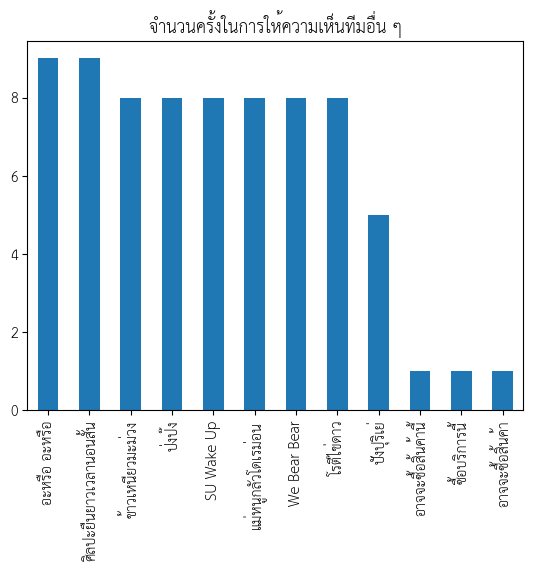

In [ ]:
team_eval_df = df[ df['ให้ความคิดเห็นโดยทีม......'] != 'อ.พู่'  ]
team_eval_df['ให้ความคิดเห็นโดยทีม......'].value_counts().plot.bar()
plt.title('จำนวนครั้งในการให้ความเห็นทีมอื่น ๆ')

- ซึ่งในทางปฏิบัติ ถ้าไม่นับอาจารย์ที่จะต้อง comment ทุกกลุ่มอยู่แล้ว หากกำหนดให้แต่ละทีมให้ความเห็นเพื่อน ๆ ได้ 1 ครั้งต่อการนำเสนอของเพื่อน ๆ แต่ละทีมควรมี `จำนวนครั้งในการให้ความเห็นทีมอื่่น ๆ` ไม่เกิน 8 ครั้ง (เพราะมีทั้งหมด 9 ทีม) ดังนั้น เราจะมาเริ่มต้นพิจารณาที่มีมีความเห็นเกิน 8 ครั้งก่อน ได้แก่
- อะหรือ อะหรือ
- ศิลปะยืนยาวเวลานอนสั้น

- ซึ่งข้อมูลที่ทีม `อะหรือ อะหรือ` และ `ศิลปะยืนยาวเวลานอนสั้น` ได้ทำการให้ความเห็นแก่ทีมอื่น ๆ เป็นไปดังตารางด้านล่าง

*กลุ่มที่ 1 : อะหรือ อะหรือ*

In [ ]:
df[ df['ให้ความคิดเห็นโดยทีม......'] == 'อะหรือ อะหรือ'  ]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......
0,2020-09-03 17:50:24.444,โรตีไข่ดาว,7,5,6,เสียงตอนพรีเซ้น custom journy เบาเกินไปครับ,อะหรือ อะหรือ
18,2020-09-03 18:24:23.962,We Bear Bear,6,5,5,เสียงในวิดีโอเบาไปหน่อย,อะหรือ อะหรือ
28,2020-09-03 18:51:55.856,SU Wake Up,7,8,7,-,อะหรือ อะหรือ
34,2020-09-03 18:54:50.165,โรตีไข่ดาว,7,5,6,เสียงตอนพรีเซ้น custom journy เบาเกินไปครับ,อะหรือ อะหรือ
40,2020-09-03 19:10:24.837,ข้าวเหนียวมะม่วง,6,6,7,product อาจจะไม่ตรงใจคนที่แพ้อาหาร หรือคนที่กิ...,อะหรือ อะหรือ
45,2020-09-03 19:17:54.544,ปังปุริเย่,7,6,7,โอกาสที่โปรแกรมจะผิดพลาดมีมากน้อยแค่ไหน,อะหรือ อะหรือ
58,2020-09-03 19:33:47.837,แม่หนูกกลัวโดเรม่อน,4,6,5,ยังไม่ค่อยเข้าใจตรง journey,อะหรือ อะหรือ
71,2020-09-03 19:43:46.639,ศิลปะยืนยาวเวลานอนสั้น,8,7,8,ตัวแอปที่ใช้ ar อาจจะมีบัค หรือ เวลาดูใน ar ก...,อะหรือ อะหรือ
78,2020-09-03 19:46:18.378,ป่งป๊ง,5,6,6,ถ้าบางคนนัดเจอแต่ไม่ได้กินที่ร้านเหล้า แล้วพาไ...,อะหรือ อะหรือ


*- กลุ่มที่ 2 : ศิลปะยืนยาวเวลานอนสั้น*

In [ ]:
df[ df['ให้ความคิดเห็นโดยทีม......'] == 'ศิลปะยืนยาวเวลานอนสั้น'  ]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......
2,2020-09-03 17:53:27.729,โรตีไข่ดาว,7,6,6,ราคาอาจจะดูไม่คุ้มทุนเท่าไหร่,ศิลปะยืนยาวเวลานอนสั้น
13,2020-09-03 18:08:11.921,อะหรือ อะหรือ,7,7,7,อาจะต้องคิดเผื่อเรื่องลูกค้ามาช้าแล้วทำให้โต๊ะ...,ศิลปะยืนยาวเวลานอนสั้น
20,2020-09-03 18:36:37.585,We Bear Bear,8,6,6,ราคาอาจะทำให้คนคิดว่าไม่คุ้มกะที่ซื้อมาติดเพรา...,ศิลปะยืนยาวเวลานอนสั้น
35,2020-09-03 18:54:55.658,SU Wake Up,8,7,8,เสียงในวิดิโอไม่ค่อยได้ยิน,ศิลปะยืนยาวเวลานอนสั้น
53,2020-09-03 19:24:04.955,ข้าวเหนียวมะม่วง,7,7,7,เพิ่มระบบนำทางไปสถานที่นั้น\n,ศิลปะยืนยาวเวลานอนสั้น
54,2020-09-03 19:27:36.392,ปังปุริเย่,7,7,7,-,ศิลปะยืนยาวเวลานอนสั้น
55,2020-09-03 19:31:05.520,แม่หนูกกลัวโดเรม่อน,7,7,7,น่าจะมีแอพที่จัดการหรือตั้งค่าตัวสินค้าได้ด้วย,ศิลปะยืนยาวเวลานอนสั้น
74,2020-09-03 19:45:28.333,ป่งป๊ง,8,7,7,-,ศิลปะยืนยาวเวลานอนสั้น
82,2020-09-03 20:56:24.953,ป่งป๊ง,8,7,7,-,ศิลปะยืนยาวเวลานอนสั้น


ซึ่งจากปัญหาที่พบข้างต้น เราจะมาแก้ไขกันทีละจุด ดังนี้

ลำดับการทำงาน
- 1. `ลบ` record สำหรับเวลา 18:54:50  ผู้ถูกประเมิน : `โรตีไข่ดาว`  / ผู้ประเมิน : `อะหรือ อะหรือ`


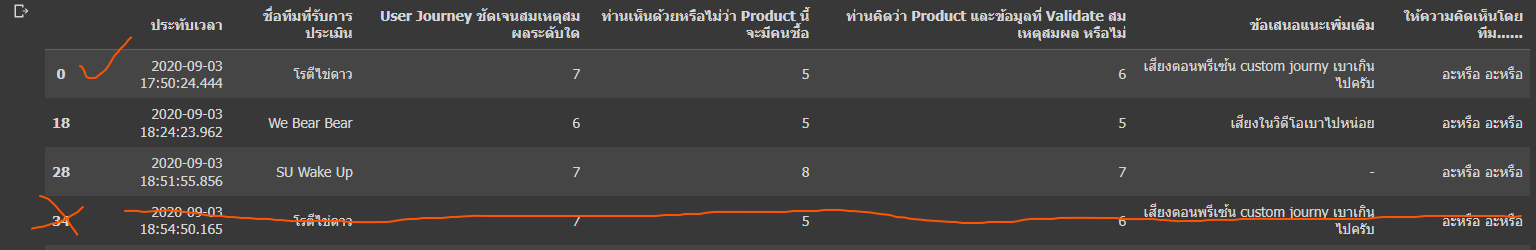

- 2. `ลบ` record  สำหรับเวลา 20:56:24 ผู้ถูกประเมิน : `ป่งป๊ง` / ผู้ประเมิน : `ศิลปะยืนยาวเวลานอนสั้น`

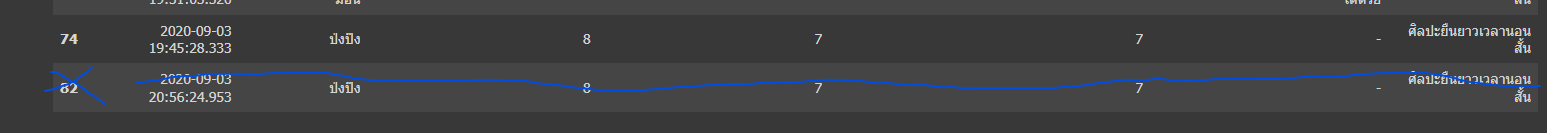

- 3. แก้ไขข้อมูลผู้ประเมินรายอื่น ๆ

- จะได้ว่า

In [ ]:
df = df[  df['ประทับเวลา'] !=  '2020-09-03 18:54:50.165']
df = df[  df['ประทับเวลา'] !=  '2020-09-03 20:56:24.953']

In [ ]:
df[ df['ให้ความคิดเห็นโดยทีม......'] == 'อะหรือ อะหรือ'  ]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......
0,2020-09-03 17:50:24.444,โรตีไข่ดาว,7,5,6,เสียงตอนพรีเซ้น custom journy เบาเกินไปครับ,อะหรือ อะหรือ
18,2020-09-03 18:24:23.962,We Bear Bear,6,5,5,เสียงในวิดีโอเบาไปหน่อย,อะหรือ อะหรือ
28,2020-09-03 18:51:55.856,SU Wake Up,7,8,7,-,อะหรือ อะหรือ
40,2020-09-03 19:10:24.837,ข้าวเหนียวมะม่วง,6,6,7,product อาจจะไม่ตรงใจคนที่แพ้อาหาร หรือคนที่กิ...,อะหรือ อะหรือ
45,2020-09-03 19:17:54.544,ปังปุริเย่,7,6,7,โอกาสที่โปรแกรมจะผิดพลาดมีมากน้อยแค่ไหน,อะหรือ อะหรือ
58,2020-09-03 19:33:47.837,แม่หนูกกลัวโดเรม่อน,4,6,5,ยังไม่ค่อยเข้าใจตรง journey,อะหรือ อะหรือ
71,2020-09-03 19:43:46.639,ศิลปะยืนยาวเวลานอนสั้น,8,7,8,ตัวแอปที่ใช้ ar อาจจะมีบัค หรือ เวลาดูใน ar ก...,อะหรือ อะหรือ
78,2020-09-03 19:46:18.378,ป่งป๊ง,5,6,6,ถ้าบางคนนัดเจอแต่ไม่ได้กินที่ร้านเหล้า แล้วพาไ...,อะหรือ อะหรือ


In [ ]:
df[ df['ให้ความคิดเห็นโดยทีม......'] == 'ศิลปะยืนยาวเวลานอนสั้น'  ]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......
2,2020-09-03 17:53:27.729,โรตีไข่ดาว,7,6,6,ราคาอาจจะดูไม่คุ้มทุนเท่าไหร่,ศิลปะยืนยาวเวลานอนสั้น
13,2020-09-03 18:08:11.921,อะหรือ อะหรือ,7,7,7,อาจะต้องคิดเผื่อเรื่องลูกค้ามาช้าแล้วทำให้โต๊ะ...,ศิลปะยืนยาวเวลานอนสั้น
20,2020-09-03 18:36:37.585,We Bear Bear,8,6,6,ราคาอาจะทำให้คนคิดว่าไม่คุ้มกะที่ซื้อมาติดเพรา...,ศิลปะยืนยาวเวลานอนสั้น
35,2020-09-03 18:54:55.658,SU Wake Up,8,7,8,เสียงในวิดิโอไม่ค่อยได้ยิน,ศิลปะยืนยาวเวลานอนสั้น
53,2020-09-03 19:24:04.955,ข้าวเหนียวมะม่วง,7,7,7,เพิ่มระบบนำทางไปสถานที่นั้น\n,ศิลปะยืนยาวเวลานอนสั้น
54,2020-09-03 19:27:36.392,ปังปุริเย่,7,7,7,-,ศิลปะยืนยาวเวลานอนสั้น
55,2020-09-03 19:31:05.520,แม่หนูกกลัวโดเรม่อน,7,7,7,น่าจะมีแอพที่จัดการหรือตั้งค่าตัวสินค้าได้ด้วย,ศิลปะยืนยาวเวลานอนสั้น
74,2020-09-03 19:45:28.333,ป่งป๊ง,8,7,7,-,ศิลปะยืนยาวเวลานอนสั้น


Text(0.5, 1.0, 'จำนวนครั้งในการให้ความเห็นทีมอื่น ๆ')

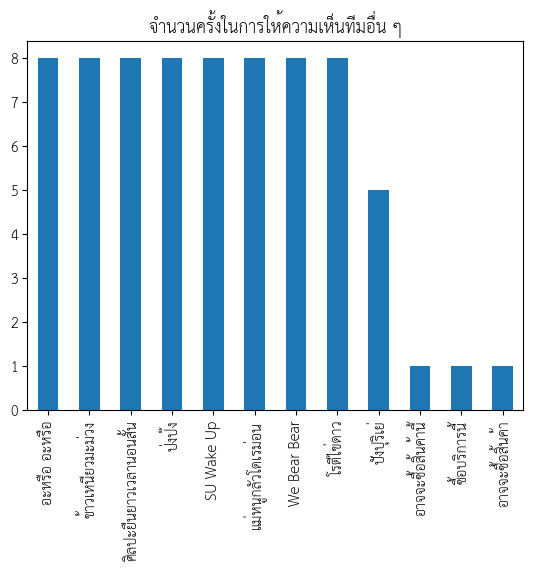

In [ ]:
team_eval_df = df[ df['ให้ความคิดเห็นโดยทีม......'] != 'อ.พู่'  ]
team_eval_df['ให้ความคิดเห็นโดยทีม......'].value_counts().plot.bar()
plt.title('จำนวนครั้งในการให้ความเห็นทีมอื่น ๆ')

- ซึ่งจากกราฟ จะเห็นว่า นอกจาก อ.พู่ ทีมส่วนใหญ่จะมีการให้ความเห็นเท่ากันคือ 8 ครั้ง แต่มีเพียงแค่ทีม `ปังปุริเย่` เท่านั้นที่ให้ความเห็นแค่ 5 ครั้ง
- แต่เมื่อพิจารณาร่วมกับคอลัมน์ `ชื่อทีมที่ได้รับการประเมิน` ซึ่งมีผู้เข้าร่วมกิจกรรมทั้งสิ้น 9 ทีม และเราทราบแล้วว่า ทีมอื่นที่เหลือทั้ง 8 ทีม ให้ความเห็นครบหมดแล้ว นั่นหมายความว่า `ความเห็นที่เหลือ` ล้วนเป็นของทีม `ปังปุริเย่` ทั้งสิ้น
- เราจะมาทำการแก้ไขชื่อทีมกันอีกรอบ

In [ ]:
# เรียกดูชื่อทีมล่าสุด
df['ให้ความคิดเห็นโดยทีม......'].value_counts()

อ.พู่                     9
อะหรือ อะหรือ             8
ข้าวเหนียวมะม่วง          8
ศิลปะยืนยาวเวลานอนสั้น    8
ป่งป๊ง                    8
SU Wake Up                8
แม่หนูกลัวโดเรม่อน        8
We Bear Bear              8
โรตีไข่ดาว                8
ปังปุริเย่                5
อาจจะซื้อสิ้นค้านี้       1
ซื้อบริการนี้             1
อาจจะซื้อสิ้นค้า          1
Name: ให้ความคิดเห็นโดยทีม......, dtype: int64

In [ ]:
# ดูชื่อทีมส่วนที่เหลือ
df[ (df['ให้ความคิดเห็นโดยทีม......'] == 'ปังปุริเย่' ) |
   (df['ให้ความคิดเห็นโดยทีม......'] == 'อาจจะซื้อสิ้นค้านี้' )   |
    (df['ให้ความคิดเห็นโดยทีม......'] == 'ซื้อบริการนี้' ) |
    (df['ให้ความคิดเห็นโดยทีม......'] == 'อาจจะซื้อสิ้นค้า' )]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......
6,2020-09-03 17:56:14.190,โรตีไข่ดาว,6,6,7,อยากทราบว่าผลิตภัณฑ์มีความทนทานมากน้อยแค่ไหน,อาจจะซื้อสิ้นค้านี้
15,2020-09-03 18:08:57.443,อะหรือ อะหรือ,9,8,8,ร้านค้าก็ต้องคอยรับคิวอยู่ตลอดเวลาใช่ไหม แล้วจ...,ซื้อบริการนี้
25,2020-09-03 18:39:41.647,We Bear Bear,8,8,7,ราคากำลังดี,อาจจะซื้อสิ้นค้า
29,2020-09-03 18:51:59.056,SU Wake Up,8,8,8,อยากให้ราคาน้อยลงกว่านี้,ปังปุริเย่
39,2020-09-03 19:09:32.731,ข้าวเหนียวมะม่วง,7,7,7,อยากทราบเวลาที่ร้านเปิด-ปิด,ปังปุริเย่
63,2020-09-03 19:36:57.788,แม่หนูกกลัวโดเรม่อน,9,8,9,อยากให้ผลิตภัณฑ์มีฟังชั่นมากกว่านี้,ปังปุริเย่
73,2020-09-03 19:45:09.241,ศิลปะยืนยาวเวลานอนสั้น,9,8,9,อยากทราบว่าหอพักที่อยู่ในเเอปจะปลอดภัยไหม,ปังปุริเย่
80,2020-09-03 19:46:49.243,ป่งป๊ง,8,7,7,ความปลอดภัยน่าเชื่อถือน้อย,ปังปุริเย่


In [ ]:
# เปลี่ยนชื่อทีมที่เหลือ เป็น ปังปุริเย่
rename_mapping_v2 = {'อาจจะซื้อสิ้นค้านี้'   : 'ปังปุริเย่' ,
                                    'ซื้อบริการนี้'           : 'ปังปุริเย่'  ,
                                    'อาจจะซื้อสิ้นค้า'      :  'ปังปุริเย่'
                  }


In [ ]:
# Using the replace() method
df['ให้ความคิดเห็นโดยทีม......'] = df['ให้ความคิดเห็นโดยทีม......'].replace(rename_mapping_v2)

- ดูผลลัพธ์ที่ถูกแก้ไขของ ปังปุริเย่

In [ ]:
df[ df['ให้ความคิดเห็นโดยทีม......'] == 'ปังปุริเย่' ]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......
6,2020-09-03 17:56:14.190,โรตีไข่ดาว,6,6,7,อยากทราบว่าผลิตภัณฑ์มีความทนทานมากน้อยแค่ไหน,ปังปุริเย่
15,2020-09-03 18:08:57.443,อะหรือ อะหรือ,9,8,8,ร้านค้าก็ต้องคอยรับคิวอยู่ตลอดเวลาใช่ไหม แล้วจ...,ปังปุริเย่
25,2020-09-03 18:39:41.647,We Bear Bear,8,8,7,ราคากำลังดี,ปังปุริเย่
29,2020-09-03 18:51:59.056,SU Wake Up,8,8,8,อยากให้ราคาน้อยลงกว่านี้,ปังปุริเย่
39,2020-09-03 19:09:32.731,ข้าวเหนียวมะม่วง,7,7,7,อยากทราบเวลาที่ร้านเปิด-ปิด,ปังปุริเย่
63,2020-09-03 19:36:57.788,แม่หนูกกลัวโดเรม่อน,9,8,9,อยากให้ผลิตภัณฑ์มีฟังชั่นมากกว่านี้,ปังปุริเย่
73,2020-09-03 19:45:09.241,ศิลปะยืนยาวเวลานอนสั้น,9,8,9,อยากทราบว่าหอพักที่อยู่ในเเอปจะปลอดภัยไหม,ปังปุริเย่
80,2020-09-03 19:46:49.243,ป่งป๊ง,8,7,7,ความปลอดภัยน่าเชื่อถือน้อย,ปังปุริเย่


In [ ]:
df['ให้ความคิดเห็นโดยทีม......'].value_counts()

อ.พู่                     9
อะหรือ อะหรือ             8
ข้าวเหนียวมะม่วง          8
ศิลปะยืนยาวเวลานอนสั้น    8
ป่งป๊ง                    8
SU Wake Up                8
ปังปุริเย่                8
แม่หนูกลัวโดเรม่อน        8
We Bear Bear              8
โรตีไข่ดาว                8
Name: ให้ความคิดเห็นโดยทีม......, dtype: int64

Text(0.5, 1.0, 'จำนวนครั้งในการให้ความเห็นทีมอื่น ๆ')

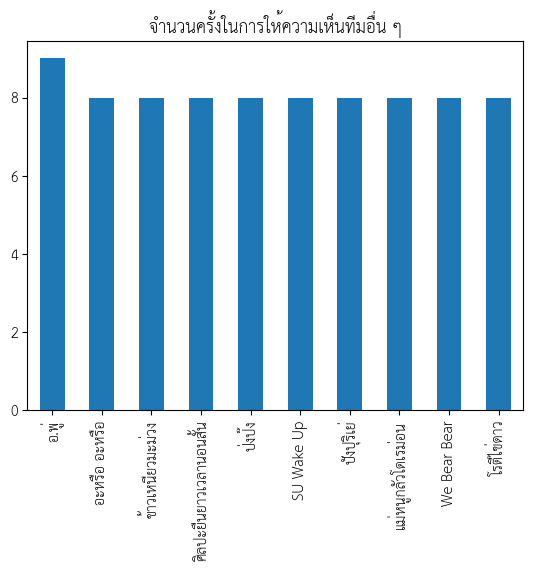

In [ ]:
df['ให้ความคิดเห็นโดยทีม......'].value_counts().plot.bar()
plt.title('จำนวนครั้งในการให้ความเห็นทีมอื่น ๆ')

#### ตอบคำถาม 1.3

- แต่ละทีมจะประเมินเพื่อนทั้งหมด `8 ทีม`

### 1.4 จำนวนข้อเสนอแนะ แบ่งตามประเภท

- มาดูกันว่าเพื่อน ๆ แต่ละทีมมีข้อเสนอแนะอย่างไรกันบ้าง

In [ ]:
df['ข้อเสนอแนะเพิ่มเติม'].unique()

array(['เสียงตอนพรีเซ้น custom journy เบาเกินไปครับ', '-',
       'ราคาอาจจะดูไม่คุ้มทุนเท่าไหร่',
       'สินค้าน่าสนใจ แต่อาจมีปัญหาเรื่องสัญญาณรบกวนได้',
       'ควรกำหนดกลุ่มเป้าหมายให้ชัดเจนกว่านี้ และเจาะกลุ่มผู้ทำแบบสอบถามให้เป็นกลุ่มที่ขัดเจนขึ้น เนื่องจากอาจการบอกเล่าเรื่องปัญหา และสินค้าที่แก้ปัญหา ยังไม่ดูน่าสนใจมากนักในวงกว้าง',
       'อธิบายนำเสนอตัวสินค้าให้ผู้ทำแบบประเมินฟังยังไม่ระเอียดพอให้เขาเข้าใจในตัวสินค้าได้ดีพอ',
       'อยากทราบว่าผลิตภัณฑ์มีความทนทานมากน้อยแค่ไหน',
       'สินค้าราคาถูกเกินไป',
       'น่าจะทำเเบบสำรวจให้มากกว่านี้ เพื่อที่จะได้ข้อมูลหรือผลเฉลี่ยที่เป็นไปได้มากขึ้น',
       'อาจจะเสียเวลาในการสั่งมากไปเพราะต้องสมัครสมาชิกก่อน',
       'ต่างกับแอปอื่นๆอย่างไร แล้วfoodpanda หรือgrabมีบริการส่งด้วยไม่ดีกว่าหรอ???',
       'จุดเด่นของแอพพลิเคชันคืออะไร',
       'อาจะต้องคิดเผื่อเรื่องลูกค้ามาช้าแล้วทำให้โต๊ะนั้นเสียเวลานในการรอลูกค้านานอาจจะทำให้โต๊ะเต็มได้',
       'ควรสัมภาษณ์ร้านค้า และควรให้แบบสอบถามกระจายถึงผู้ค้าด้วย',
       'ร้านค้าก็ต้องค

- มาดูกันว่าหลังจาก clean ไปก่อนหน้านี้แล้วตอนนี้เหลือกี่ row

In [ ]:
print(f"current row number = {df.shape[0]}\ncurrent col number = {df.shape[1]}")

current row number = 81
current col number = 7


- สร้าง list  คลังคำศัพท์มาเพื่อคัดกรองประเภทของข้อความ

In [ ]:
# Define a lists of keywords for each category
suggestion_no        = [   'ไม่มี', '-'  , 'โอเคแล้ว' , 'โอเครแล้ว'   ,'ไมมี' ]
suggestion_price     = [   'ราคา','รคา' ,  'ราคาถูก' ,'แพง' , 'ส่วนลด'   , 'price' , 'cost'   ,  'คอสต์'  , 'ค่าบริการ'      ]
suggestion_safety    = [ 'โจร' , 'มิจ'  ,
                                    'มิจฉาชีพ' , 'มิตฉาชีพ' , 'มิชฉาชีพ' , 'มัชชาชีพ' , 'มัจฉาชีพ'  , 'มิชฉาฉีพ' , 'มิจฉาฉีพ'
                                    'มิจจาชีพ' , 'มิจจาชิพ' , 'มิจาชีพ' , 'มิจาชีพ' , 'มิจาชิพ' ,
                                    'มิฉาชีพ' , 'มิชาชีพ' , 'มิฉฉาชีพ' , 'มิจฉาชิพ' , 'มิฉฉาชิพ' ,'มิฉาชิพ'  ,
                                    'ปลอดภัย' ,'ปอดภัย' ,  'เชื่อถือ' , 'เช่อถือ','เชือถือ' ,
                                     'อุบัติเหต','อุบัติเหตุ','อุบัตเหตุ', 'ล้ม','สลบ','หมดสติ','พาไปทำอย่างอื่นแทน' , 'เซฟตี','เซฟตี้']

-  สร้าง function เพื่อใช้ในการคัดกรองข้อความ แล้วนำมาจัดแบ่งประเภท

In [ ]:
import re

In [ ]:
# define a function to categorize suggestion
def classify_suggestion(text):
    text = str(text)

    pattern_other_1 = r".{2,}-."

    pattern_other_2 = r"- .+"

    if re.search(pattern_other_1, text) or re.search( pattern_other_2, text)  :
        return "ด้านอื่นๆ"

    elif any(keyword in text for keyword in suggestion_no)  :
        return "ไม่มีข้อเสนอแนะ"

    elif any(keyword in text for keyword in suggestion_price) :
        return "ด้านราคา"

    elif any(keyword in text for keyword in suggestion_safety) :
        return "ด้านความปลอดภัย"

    else :
        return "ด้านอื่นๆ"



In [ ]:
# Apply the new classification function to the column
df["ประเภทข้อเสนอแนะ"] = df["ข้อเสนอแนะเพิ่มเติม"].apply(classify_suggestion)

##### ตอบคำถาม 1.4

- ดูจำนวนข้อเสนอแนะแบ่งตามประเภท (Overview)

In [ ]:
# Count the number of texts in each category
df["ประเภทข้อเสนอแนะ"].value_counts()

ด้านอื่นๆ          42
ด้านราคา           15
ไม่มีข้อเสนอแนะ    13
ด้านความปลอดภัย    11
Name: ประเภทข้อเสนอแนะ, dtype: int64

#### 1.4.1 ไม่มีข้อเสนอแนะ

In [ ]:
suggestion_no = (df["ประเภทข้อเสนอแนะ"] == "ไม่มีข้อเสนอแนะ") .sum()
print(f"ข้อเสนอแนะเพิ่มเติม : ไม่มีข้อเสนอแนะ - > มี  {suggestion_no}  รายการ")

ข้อเสนอแนะเพิ่มเติม : ไม่มีข้อเสนอแนะ - > มี  13  รายการ


- ข้อมูลแสดงดังด้านล่าง

In [ ]:
df [  df['ประเภทข้อเสนอแนะ'] == 'ไม่มีข้อเสนอแนะ'  ]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......,ประเภทข้อเสนอแนะ
1,2020-09-03 17:53:21.863,โรตีไข่ดาว,9,7,8,-,ข้าวเหนียวมะม่วง,ไม่มีข้อเสนอแนะ
12,2020-09-03 18:07:57.568,อะหรือ อะหรือ,9,9,9,-,ข้าวเหนียวมะม่วง,ไม่มีข้อเสนอแนะ
21,2020-09-03 18:36:48.078,We Bear Bear,9,7,8,-,ข้าวเหนียวมะม่วง,ไม่มีข้อเสนอแนะ
28,2020-09-03 18:51:55.856,SU Wake Up,7,8,7,-,อะหรือ อะหรือ,ไม่มีข้อเสนอแนะ
31,2020-09-03 18:53:30.727,SU Wake Up,10,9,9,-,ข้าวเหนียวมะม่วง,ไม่มีข้อเสนอแนะ
48,2020-09-03 19:22:07.261,ปังปุริเย่,9,9,9,-,ข้าวเหนียวมะม่วง,ไม่มีข้อเสนอแนะ
54,2020-09-03 19:27:36.392,ปังปุริเย่,7,7,7,-,ศิลปะยืนยาวเวลานอนสั้น,ไม่มีข้อเสนอแนะ
59,2020-09-03 19:34:37.166,แม่หนูกกลัวโดเรม่อน,7,8,8,-,ข้าวเหนียวมะม่วง,ไม่มีข้อเสนอแนะ
61,2020-09-03 19:35:07.927,แม่หนูกกลัวโดเรม่อน,8,7,9,ไม่มี,SU Wake Up,ไม่มีข้อเสนอแนะ
67,2020-09-03 19:41:55.852,ศิลปะยืนยาวเวลานอนสั้น,9,9,8,-,ข้าวเหนียวมะม่วง,ไม่มีข้อเสนอแนะ


#### 1.4.2 ด้านราคา

In [ ]:
suggestion_no = (df["ประเภทข้อเสนอแนะ"] == "ด้านราคา") .sum()
print(f"ข้อเสนอแนะเพิ่มเติม : ด้านราคา - > มี  {suggestion_no}  รายการ")

ข้อเสนอแนะเพิ่มเติม : ด้านราคา - > มี  15  รายการ


- ข้อมูลแสดงดังด้านล่าง

In [ ]:
df [  df['ประเภทข้อเสนอแนะ'] == 'ด้านราคา'  ]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......,ประเภทข้อเสนอแนะ
2,2020-09-03 17:53:27.729,โรตีไข่ดาว,7,6,6,ราคาอาจจะดูไม่คุ้มทุนเท่าไหร่,ศิลปะยืนยาวเวลานอนสั้น,ด้านราคา
7,2020-09-03 17:57:02.981,โรตีไข่ดาว,8,8,7,สินค้าราคาถูกเกินไป,แม่หนูกลัวโดเรม่อน,ด้านราคา
16,2020-09-03 18:09:22.060,อะหรือ อะหรือ,8,5,8,ถ้าพูดถึงข้อเสนอเเนะของสินค้า หรือบริการ คือคิ...,SU Wake Up,ด้านราคา
17,2020-09-03 18:10:53.154,อะหรือ อะหรือ,9,6,7,อาจจะมีคูปองส่วนลดให้สำหรับสมาชิก,แม่หนูกลัวโดเรม่อน,ด้านราคา
20,2020-09-03 18:36:37.585,We Bear Bear,8,6,6,ราคาอาจะทำให้คนคิดว่าไม่คุ้มกะที่ซื้อมาติดเพรา...,ศิลปะยืนยาวเวลานอนสั้น,ด้านราคา
25,2020-09-03 18:39:41.647,We Bear Bear,8,8,7,ราคากำลังดี,ปังปุริเย่,ด้านราคา
26,2020-09-03 18:47:07.173,SU Wake Up,5,4,6,ราคาค่อนข้างสูงไปนิด เพราะต้องซื้อหลายชิ้นนำไป...,โรตีไข่ดาว,ด้านราคา
27,2020-09-03 18:50:52.564,SU Wake Up,6,7,7,นำราคาที่กลุ่มเป้าหมายสนใจไปประเมินหาราคาที่เห...,อ.พู่,ด้านราคา
29,2020-09-03 18:51:59.056,SU Wake Up,8,8,8,อยากให้ราคาน้อยลงกว่านี้,ปังปุริเย่,ด้านราคา
30,2020-09-03 18:52:46.038,SU Wake Up,7,7,7,อาจจะซื้อถ้ามีราคาถูก,We Bear Bear,ด้านราคา


#### 1.4.3 ด้านความปลอดภัย

In [ ]:
suggestion_no = (df["ประเภทข้อเสนอแนะ"] == 'ด้านความปลอดภัย' ) .sum()
print(f"ข้อเสนอแนะเพิ่มเติม : ด้านความปลอดภัย- > มี  {suggestion_no}  รายการ")

ข้อเสนอแนะเพิ่มเติม : ด้านความปลอดภัย- > มี  11  รายการ


- ข้อมูลแสดงดังด้านล่าง

In [ ]:
df [  df['ประเภทข้อเสนอแนะ'] == 'ด้านความปลอดภัย'  ]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......,ประเภทข้อเสนอแนะ
57,2020-09-03 19:32:37.560,แม่หนูกกลัวโดเรม่อน,7,6,7,จะรู้ได้ยังไงว่าคนสวมใส่ล้ม,โรตีไข่ดาว,ด้านความปลอดภัย
60,2020-09-03 19:34:37.325,แม่หนูกกลัวโดเรม่อน,5,7,5,ถ้าเกิดเราประสบอุบัติเหตุ อุปกรณ์จะทำงานได้ไง ...,We Bear Bear,ด้านความปลอดภัย
69,2020-09-03 19:42:55.380,ศิลปะยืนยาวเวลานอนสั้น,7,6,7,มีความปลอดภัยหรือความน่าเชื่อถือมากน้อยเเค่ไหน...,We Bear Bear,ด้านความปลอดภัย
72,2020-09-03 19:44:33.206,ป่งป๊ง,6,6,6,ความปลอดภัยระดับไหน,โรตีไข่ดาว,ด้านความปลอดภัย
73,2020-09-03 19:45:09.241,ศิลปะยืนยาวเวลานอนสั้น,9,8,9,อยากทราบว่าหอพักที่อยู่ในเเอปจะปลอดภัยไหม,ปังปุริเย่,ด้านความปลอดภัย
75,2020-09-03 19:45:31.330,ป่งป๊ง,7,7,7,อยากให้ระบบปลอดภัยมาขึ้น เพราะเดี้ยวนี้มิจฉาชี...,We Bear Bear,ด้านความปลอดภัย
77,2020-09-03 19:45:38.963,ป่งป๊ง,8,6,6,ถ้ามีมิจฉาชีพแฝงตัว จะป้องกันอย่างไร และถ้าแนว...,อ.พู่,ด้านความปลอดภัย
78,2020-09-03 19:46:18.378,ป่งป๊ง,5,6,6,ถ้าบางคนนัดเจอแต่ไม่ได้กินที่ร้านเหล้า แล้วพาไ...,อะหรือ อะหรือ,ด้านความปลอดภัย
79,2020-09-03 19:46:45.734,ป่งป๊ง,6,5,5,อยากให้ระบุความปลอดภัย ให้มีความน่าเชื่อถือกว่...,แม่หนูกลัวโดเรม่อน,ด้านความปลอดภัย
80,2020-09-03 19:46:49.243,ป่งป๊ง,8,7,7,ความปลอดภัยน่าเชื่อถือน้อย,ปังปุริเย่,ด้านความปลอดภัย


#### 1.4.4 ด้านอื่น ๆ

In [ ]:
suggestion_no = (df["ประเภทข้อเสนอแนะ"] == 'ด้านอื่นๆ' ) .sum()
print(f"ข้อเสนอแนะเพิ่มเติม : ไม่มีข้อเสนอแนะ - > มี  {suggestion_no}  รายการ")

ข้อเสนอแนะเพิ่มเติม : ไม่มีข้อเสนอแนะ - > มี  42  รายการ


- ข้อมูลแสดงดังด้านล่าง

In [ ]:
df [  df['ประเภทข้อเสนอแนะ'] == "ด้านอื่นๆ" ]

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......,ประเภทข้อเสนอแนะ
0,2020-09-03 17:50:24.444,โรตีไข่ดาว,7,5,6,เสียงตอนพรีเซ้น custom journy เบาเกินไปครับ,อะหรือ อะหรือ,ด้านอื่นๆ
3,2020-09-03 17:54:16.121,โรตีไข่ดาว,9,7,8,สินค้าน่าสนใจ แต่อาจมีปัญหาเรื่องสัญญาณรบกวนได้,ป่งป๊ง,ด้านอื่นๆ
4,2020-09-03 17:55:17.173,โรตีไข่ดาว,5,5,4,ควรกำหนดกลุ่มเป้าหมายให้ชัดเจนกว่านี้ และเจาะก...,อ.พู่,ด้านอื่นๆ
5,2020-09-03 17:55:27.787,โรตีไข่ดาว,8,7,7,อธิบายนำเสนอตัวสินค้าให้ผู้ทำแบบประเมินฟังยังไ...,SU Wake Up,ด้านอื่นๆ
6,2020-09-03 17:56:14.190,โรตีไข่ดาว,6,6,7,อยากทราบว่าผลิตภัณฑ์มีความทนทานมากน้อยแค่ไหน,ปังปุริเย่,ด้านอื่นๆ
8,2020-09-03 17:59:14.101,โรตีไข่ดาว,7,7,5,น่าจะทำเเบบสำรวจให้มากกว่านี้ เพื่อที่จะได้ข้อ...,We Bear Bear,ด้านอื่นๆ
9,2020-09-03 18:03:53.242,อะหรือ อะหรือ,8,6,6,อาจจะเสียเวลาในการสั่งมากไปเพราะต้องสมัครสมาชิ...,ป่งป๊ง,ด้านอื่นๆ
10,2020-09-03 18:05:03.284,อะหรือ อะหรือ,7,5,5,ต่างกับแอปอื่นๆอย่างไร แล้วfoodpanda หรือgrabม...,We Bear Bear,ด้านอื่นๆ
11,2020-09-03 18:07:30.853,อะหรือ อะหรือ,7,6,6,จุดเด่นของแอพพลิเคชันคืออะไร,โรตีไข่ดาว,ด้านอื่นๆ
13,2020-09-03 18:08:11.921,อะหรือ อะหรือ,7,7,7,อาจะต้องคิดเผื่อเรื่องลูกค้ามาช้าแล้วทำให้โต๊ะ...,ศิลปะยืนยาวเวลานอนสั้น,ด้านอื่นๆ


### 1.5 จากข้อ 1.4 ให้เพิ่ม Column ของประเภทข้อเสนอแนะ

##### ตอบคำถาม 1.5

In [ ]:
print(f"current row number = {df.shape[0]}\ncurrent col number = {df.shape[1]}")

current row number = 81
current col number = 8


In [ ]:
df.columns

Index(['ประทับเวลา', 'ชื่อทีมที่รับการประเมิน',
       'User Journey ชัดเจนสมเหตุสมผลระดับใด',
       'ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ',
       'ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่',
       'ข้อเสนอแนะเพิ่มเติม', 'ให้ความคิดเห็นโดยทีม......',
       'ประเภทข้อเสนอแนะ'],
      dtype='object')

In [ ]:
df.head(3)

,ประทับเวลา,ชื่อทีมที่รับการประเมิน,User Journey ชัดเจนสมเหตุสมผลระดับใด,ท่านเห็นด้วยหรือไม่ว่า Product นี้จะมีคนซื้อ,ท่านคิดว่า Product และข้อมูลที่ Validate สมเหตุสมผล หรือไม่,ข้อเสนอแนะเพิ่มเติม,ให้ความคิดเห็นโดยทีม......,ประเภทข้อเสนอแนะ
0,2020-09-03 17:50:24.444,โรตีไข่ดาว,7,5,6,เสียงตอนพรีเซ้น custom journy เบาเกินไปครับ,อะหรือ อะหรือ,ด้านอื่นๆ
1,2020-09-03 17:53:21.863,โรตีไข่ดาว,9,7,8,-,ข้าวเหนียวมะม่วง,ไม่มีข้อเสนอแนะ
2,2020-09-03 17:53:27.729,โรตีไข่ดาว,7,6,6,ราคาอาจจะดูไม่คุ้มทุนเท่าไหร่,ศิลปะยืนยาวเวลานอนสั้น,ด้านราคา


### 1.6 Download Dataframe ที่ทำการ Preprocess เรียบร้อยแล้วในรูป Excel file

In [ ]:
# save dataframe : df  in form of excel file
df.to_excel("Idea-Validation_clean.xlsx", index=False, engine='openpyxl')

# การส่งงาน (Please delete before submission)

- Copy ไปรันใน Account ของ 65056071@kmitl.ac.th (และ Account นี้เป็นบัญชีสำรอง)
- ให้ส่งใน Folder ที่ได้รับสิทธิ์ โดยให้นักศึกษาสร้าง Folder ย่อยตามจำนวนข้อที่ส่ง
- สิ่งที่ต้องส่งแต่ละข้อ คือ Clip การอธิบาย และ File ประกอบทั้งหมด
- Deadline : วันอังคารที่ 12 กันยายน เวลา 23.59